In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [39]:
# Base de dados
path = kagglehub.dataset_download("smithsonian/volcanic-eruptions")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/smithsonian/volcanic-eruptions/versions/1


['database.csv']

In [40]:
ds = pd.read_csv(path + '/database.csv')

In [41]:
num_linhas = ds.shape[0]
print(f"O dataset compartilhado possui {num_linhas} linhas.")

O dataset compartilhado possui 1508 linhas.


In [42]:
ds.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [43]:
ds.isnull().sum()

,0
Number,0
Name,0
Country,0
Region,0
Type,0
Activity Evidence,1
Last Known Eruption,0
Latitude,0
Longitude,0
Elevation (Meters),0


In [44]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               1508 non-null   int64  
 1   Name                 1508 non-null   object 
 2   Country              1508 non-null   object 
 3   Region               1508 non-null   object 
 4   Type                 1508 non-null   object 
 5   Activity Evidence    1507 non-null   object 
 6   Last Known Eruption  1508 non-null   object 
 7   Latitude             1508 non-null   float64
 8   Longitude            1508 non-null   float64
 9   Elevation (Meters)   1508 non-null   int64  
 10  Dominant Rock Type   1455 non-null   object 
 11  Tectonic Setting     1501 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [45]:
ds['Dominant Rock Type']=ds['Dominant Rock Type'].fillna('Unknown')

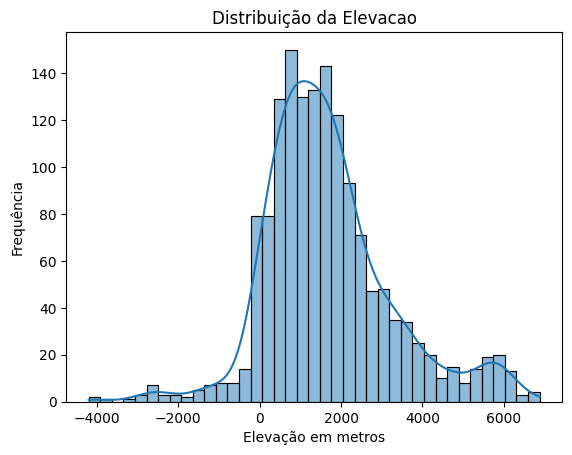

In [46]:
#Distribuição da altura
sns.histplot(ds['Elevation (Meters)'], kde=True)
plt.title('Distribuição da Elevacao')
plt.xlabel('Elevação em metros')
plt.ylabel('Frequência')
plt.show()

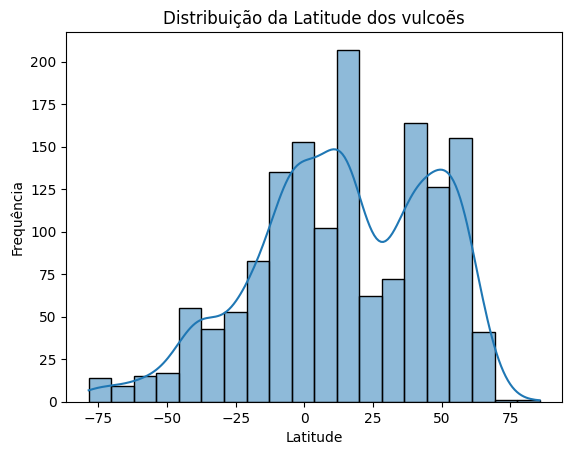

In [47]:
#Distribuição da Latitude
sns.histplot(ds['Latitude'], kde=True)
plt.title('Distribuição da Latitude dos vulcoẽs')
plt.xlabel('Latitude')
plt.ylabel('Frequência')
plt.show()

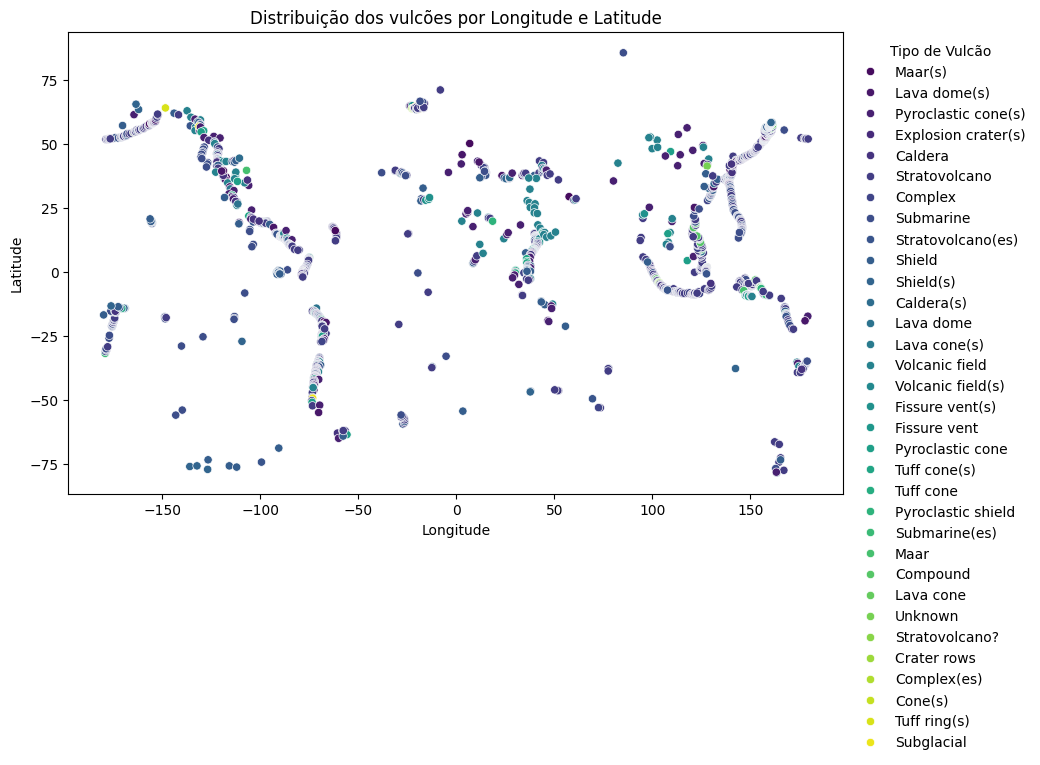

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Longitude', y='Latitude', hue='Type', palette='viridis')
plt.title('Distribuição dos vulcões por Longitude e Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tipo de Vulcão', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

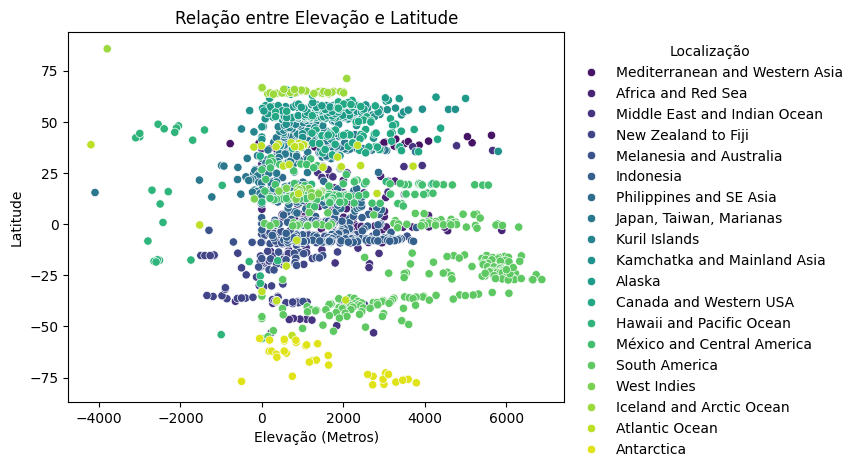

In [49]:
# Gráfico de dispersão entre Elevation e Latitude
sns.scatterplot(data=ds, x='Elevation (Meters)', y='Latitude', hue='Region', palette='viridis')
plt.title('Relação entre Elevação e Latitude')
plt.xlabel('Elevação (Metros)')
plt.ylabel('Latitude')
plt.legend(title='Localização', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

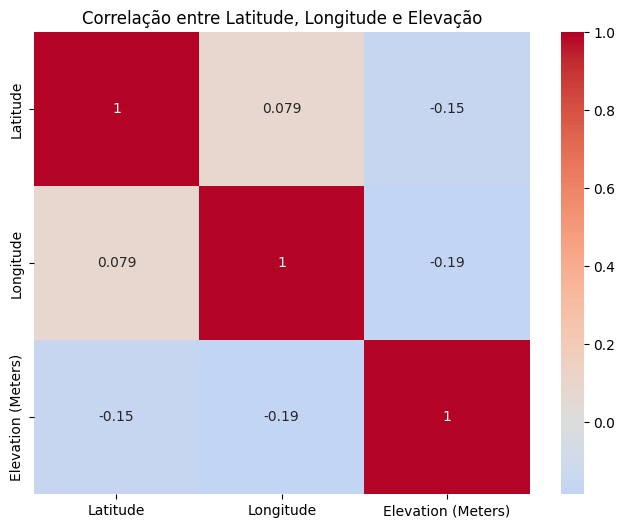

In [50]:
corr = ds[['Latitude', 'Longitude', 'Elevation (Meters)']].corr()

#Exibir mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre Latitude, Longitude e Elevação')
plt.show()

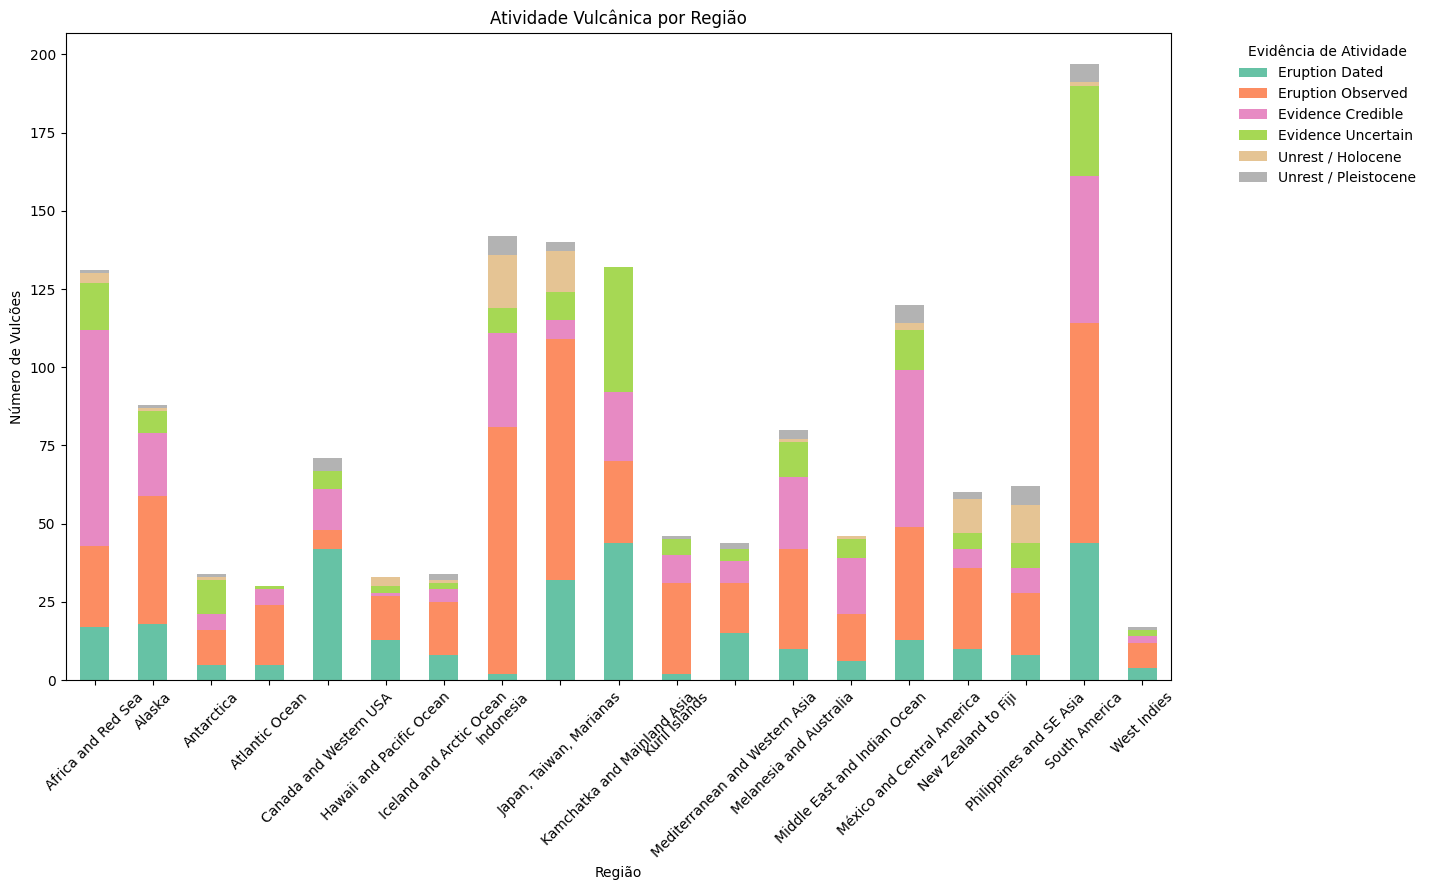

In [63]:
# Verificar a atividade vulcânica por Região
activity_by_region = ds.groupby('Region')['Activity Evidence'].value_counts().unstack().fillna(0)

activity_by_region.plot(kind='bar', stacked=True, figsize=(12, 9), colormap='Set2')
plt.title('Atividade Vulcânica por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vulcões')
plt.xticks(rotation=45)
plt.legend(title='Evidência de Atividade')
plt.tight_layout()
plt.legend(title='Evidência de Atividade', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()
